# Entrenamiento personalizado
Esta guía usa *machine learning* para predecir la progresión de la diabetes después un año. Utiliza TensorFlow para:
1. Construir un modelo
2. Entrenar este modelo en datos de ejemplo
3. Usa el modelo para hacer predicciones en datos desconocidos

Este tutorial está estructurado de la siguiente manera:

1. Importación y análisis del conjunto de datos.
2. Selección del tipo de modelo.
3. Entrenamiento del modelo.
4. Evaluación de la efectividad del modelo.
5. Uso del modelo entrenado para hacer predicciones.

## Preparación del programa

### Configuración de los *imports*

Importa TensorFlow y los demás módulos de Python necesarios. De forma predeterminada, TensorFlow usa una *eager execution* para evaluar las operaciones de inmediato, y muestra valores concretos en lugar de crear un gráfico computacional que se ejecuta más tarde. Si estás acostumbrado la consola interactiva de python , esto te resultará familiar.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from math import ceil
import numpy as np

2024-05-21 16:53:12.131995: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-21 16:53:12.132075: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-21 16:53:12.133354: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-21 16:53:12.143273: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-21 16:53:12.883210: W tensorflow/compiler/tf2

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
# print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.15.0


## Problema de regresión *Diabetes*

Este conjunto de datos contiene 10 variables descriptivas edad, sexo, índice de masa corporal, presión sanguínea promedio, y seis mediciones de suero sanguíneo tomadas para cada uno de los 442 pacientes con diabetes. Además, contiene la variable de interés a predecir, una medida cuantitavita de la progresión de la enferemedad un año después del inicio.

### Características del conjunto de datos


*   Número de instancias: 442
*   Número de atributos: Las 10 primeras columnas son valores predictivos numéricos

*   Variable objetivo: La columna 11 es una medida cuantitativa de la progresión de la enfermedad después de un año
*   Elemento de lista

### Información de los atributos:

       - age: edad en años
       - sex
       - bmi: índice de masa corporal
       - bp: presión arterial media
       - s1 tc, células T (un tipo de glóbulos blancos)
       - s2 ldl, lipoproteínas de baja densidad
       - s3 hdl, lipoproteínas de alta densidad
       - s4 tch, hormona estimulante de la tiroides
       - s5 ltg, lamotrigina
       - glu s6, nivel de azúcar en sangre


Nota: Cada una de estas 10 variables se ha centrado en la media y se ha escalado por la desviación estándar.




## Importación y preparación del conjunto de datos


### Carga del conjunto de datos

In [3]:
diabetes = datasets.load_diabetes()
features, labels = diabetes.data, diabetes.target

In [4]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

### Partición del conjunto de datos en Entrenamiento, Validación y Test

A continuación vamos a separar nuestro conjunto de datos en 3 conjuntos distintos (entrenamiento, validación y test). Para ello utiliza el método `tain_test_split` de la librería *sklearn*. Para garantizar aleatoriedad en las particiones, mezcla de manera aleatoria las muestras. Para llevar a cabo las particiones, mantén un 70% de los datos para el conjunto de entrenamiento y un 15% tanto para el de validación como para el de test.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42, shuffle= True, stratify= None)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle= True, stratify= None)

A continuación vamos a estandarizar los datos. Como ya se ha comentado anteriormente, no sería necesarario ya que los datos ya vienen estandarizados al cargarlos. No obstante, a modo de ejercicio, estandariza los datos manualmente, sin ayuda de librerías externas siguiendo la siguiente fórmula:

$$x_{norm}=\frac{x-\mu}{\sigma}$$

Dónde $\mu$ es la media y $\sigma$ las desviación estandar.

In [6]:
mu_x = X_train.mean(axis = 0)
sigma_x = X_train.std(axis = 0)

X_train_norm = (X_train - mu_x) / sigma_x
X_val_norm = (X_val - mu_x) / sigma_x
X_test_norm = (X_test - mu_x) / sigma_x

In [7]:
mu_y = y_train.mean(axis = 0)
sigma_y = y_train.std(axis = 0)

y_train_norm = (y_train - mu_y) / sigma_y
y_val_norm = (y_val - mu_y) / sigma_y
y_test_norm = (y_test - mu_y) / sigma_y

A continuación, utiliza el método `tf.data.Dataset.from_tensor_slices` para convertir tus datos a tensores.

In [8]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_norm, y_train_norm))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val_norm, y_val_norm))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_norm, y_test_norm))

2024-05-21 16:53:14.308489: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 16:53:14.388682: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 16:53:14.389247: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 16:53:14.392077: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-21 16:53:14.392543: I external/local_xla/xla/stream_executor

In [9]:
for element in train_dataset:
    print(element)
    break

(<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([ 6.42054387e-01,  1.05661647e+00,  6.19059528e-01,  1.00486384e+00,
       -8.68438531e-01, -9.32812513e-01, -1.44851520e+00,  6.76301514e-01,
        1.27560982e+00, -2.79646760e-04])>, <tf.Tensor: shape=(), dtype=float64, numpy=0.6899172431152013>)


In [10]:
type(train_dataset)

tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset

El objeto que te devuelve para cada uno de tus conjuntos de datos es de tipo `TensorSliceDataset`. Éste, tiene métodos interesantes para poder generar *batches* para entrenar la red neuronal. Echa un vistazo a la [API](https://www.tensorflow.org/api_docs/python/tf/data/Dataset) para ver los métdos que pueden resultar útiles. Te diré como pista que queremos "barajar" los datos después de cada iteración. Además queremos dividir los datos en *batches*, y mantener siempre el mismo tamaño de *batch* (incluso el último, aunque la longitud de nuestros datos entre la longitud del *batch* no sea un número entero). Además, pégale un vistazo a la opicón *cache*. Para este ejercicio puede no ser necesaria pero para otra clase de problemas puede ser muy útil.

In [11]:
BATCH_SIZE = 16
train_dataset = (train_dataset.cache()
                            .shuffle(len(X_train_norm),reshuffle_each_iteration=True)
                            .repeat()
                            .batch(BATCH_SIZE)
                            .take(ceil(len(X_train_norm)/BATCH_SIZE)))

val_dataset = (val_dataset.cache()
                            .shuffle(len(X_val_norm),reshuffle_each_iteration=True)
                            .repeat()
                            .batch(BATCH_SIZE)
                            .take(ceil(len(X_val_norm)/BATCH_SIZE)))


In [12]:
len(X_train_norm)/BATCH_SIZE

19.3125

In [13]:
i = 0
for element in train_dataset:
    i += 1
    print(i)
    print(element)
    

1
(<tf.Tensor: shape=(16, 10), dtype=float64, numpy=
array([[ 1.42777639e+00,  1.05661647e+00, -5.94049959e-01,
        -8.62887753e-01, -1.35613445e+00, -1.27302182e+00,
        -4.94283646e-02, -8.46078961e-01, -4.40954470e-01,
         1.72542051e-01],
       [-5.36528617e-01, -9.46417203e-01,  1.18068429e+00,
        -8.62887753e-01, -9.25814522e-01, -9.32812513e-01,
         2.61479822e-01, -8.46078961e-01, -3.74149496e-01,
         7.77417992e-01],
       [-3.79384216e-01,  1.05661647e+00,  2.59597869e+00,
         2.01057624e+00,  3.07769268e-01,  3.42972399e-01,
        -4.38063597e-01,  6.76301514e-01,  6.87878305e-01,
        -2.79646760e-04],
       [-3.79384216e-01, -9.46417203e-01,  1.06835934e+00,
         1.43588344e+00, -7.24998556e-01, -6.05688177e-01,
         1.83752775e-01, -8.46078961e-01, -6.06539450e-01,
        -2.59512193e-01],
       [-1.16510622e+00, -9.46417203e-01, -1.35785964e+00,
        -5.75541354e-01, -1.51238654e-01, -1.28086646e-01,
         6.501150

## Creación y entrenamiento del Modelo Neuronal


En este apartado vamos a crear y entrenar un Perceptron Multicapa. A continuación crea dicho modelo neuronal utilizando *layers* de *Keras*. Puedes utilizar tanto la api secuencial como la funcional. Crea un modelo con una capa oculta. No te preocupes por el número de neuronas, vamos a ir jugando para ver como varían los resultados en función de este parámetro.

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(300, activation = 'relu', input_shape = (diabetes.data.shape[1],)),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])


A continuación vamos a crear nuestra función de pérdidas ¿Qué tipo de loss utilizarías para este problema? Utiliza las classe disponibles en la api de *keras* y después crea una función que devuelva el *loss* teniendo como parámetros de entrada los datos de entrada a la red y la variable de salida conocida. Ten en cuenta que para calcular el *loss*, deberás calcular la salida del modelo para dicha entrada.

In [15]:
loss_object = tf.keras.losses.MeanSquaredError()


In [16]:
def loss(x, y):
   y_ = model(x, training = False)
   return loss_object(y_true = y, y_pred = y_)


A continuación crearemos el optimizador. Utiliza el *Stocasthic Gradient Descent* disponible en la librería de *Keras*.

In [17]:
optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=0.01)


A continuación vamos a crear los pasos de entrenamiento y validación de manera manual. El proceso para entrenar y validar una red es el siguiente. Se coje un *batch* del conjunto de datos de entrenamiento, se entrena la red y se calcula el *loss*. Este *loss* se va acumulando hasta que acaba la época para tener una metrica que varía en cada época. Con el conjunto de validación se hace lo mismo, solo que no se entrena (no se actualizan los pesos de la red) con ellos, solamente calculamos el error en este conjunto. Es decir, estos datos se utilizan para ver como evoluciona el error de la red durante el entrenamiento para datos que nunca ha visto antes. Por ello, en el paso de validación no se ha de actualiar los pesos, es decir, solamente se hará el *forward pass* y se evitará el *backward pass*.

<br><rb>
Tal y como se ha comentado anteriormente, en el proceso de entrenamiento se actualizan los pesos, por lo que se han de calcular los gradientes. [Aquí](https://www.tensorflow.org/api_docs/python/tf/GradientTape) tienes ayuda de como calcular los gradientes:

In [18]:
def train_step(inputs, labels):
    with tf.GradientTape() as tape:
        loss_value = loss(inputs, labels)
        gradients =  tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
   
    return loss_value

A continuación calcularemos el `val_step`, este es más fácil todavía, recuerda que en este paso no hay cálulo de gradientes ni retropropagación de los mismos a través de la red:

In [19]:
def val_step(inputs, labels):
     loss_value = loss(inputs, labels)
     return loss_value

A continuación, crea el proceso de entrenamiento. El proceso es similar al del ejercicio anterior, dónde se crearon *batches* de nuestro conjunto de datos para ir pasándoselos a la red por lotes. Ten en cuenta que en este caso, los lotes están creados internamente en objeto de datos de tipo `TensorSliceDataset` que has creado. Este objeto es un iterable, así que puedes utilizarlo en un bucle `for` para que te vaya devolviendo *batches*. Por lo tanto, necesitarás 2 bucles `for`. El primero iterará sobre un número de iteraciones (épocas), y el segundo sobre los *batches*. Se pasará cada *batch* a la red para realizar el entrenamiento (con el método que has creado `train_step`). Además necesitas crear las métricas a utilizar. Despúes de pasar por la red cada *batch* calcularemos el *loss* promedio. Para ello utiliza `tf.keras.metrics.Mean()`. Has de realizar el mismo proceso pero utilizando el método `val_step`.

<br><rb>

Imprime los resultados por pantalla (cada 5 épocas)


In [20]:
train_loss_results = []
val_loss_results = []

num_epochs = 50

# Bucle de épocas:
for epoch in range(num_epochs):
    
    # Aquí creamos las métricas de validación y test con tf.keras.metrics.Mean()
    epoch_train_loss_avg = tf.metrics.Mean()
    epoch_val_loss_avg = tf.metrics.Mean()

    # Bucle de los batches de entrenamiento
    for n_sample, (x, y) in enumerate(train_dataset):
      # Aquí entrenamos con los datos del batch y actualizamos métricas
        train_loss = train_step(x, y)
        epoch_train_loss_avg.update_state(train_loss)

    # Bucle de los batches de validación
    for x, y in val_dataset:
      # Aquí validamos y actualizamos métricas   
      val_loss = val_step(x, y)
      epoch_val_loss_avg.update_state(val_loss)
   
    # Aquí, para cada época, añadimos las métricas a los vectores creados al 
    # inicio de este código. Además imprimmor por pantalla los resultados cada
    # 5 épocas.
    train_loss_results.append(epoch_train_loss_avg.result())
    val_loss_results.append(epoch_val_loss_avg.results())

    if epoch % 5 ==0:
       print('Epoch {:03d}: Training Loss: {:03f}, Val Loss: {:03f},'.format(epoch, epoch_train_loss_avg.result(), epoch_val_loss_avg.result()))
    

2024-05-21 16:53:19.356802: W external/local_xla/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:504] Can't find libdevice directory ${CUDA_DIR}/nvvm/libdevice. This may result in compilation or runtime failures, if the program we try to run uses routines from libdevice.
Searched for CUDA in the following directories:
  ./cuda_sdk_lib
  /usr/local/cuda-12.2
  /usr/local/cuda
  /home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/tensorflow/python/platform/../../../nvidia/cuda_nvcc
  /home/vic_263/miniconda3/envs/work/lib/python3.11/site-packages/tensorflow/python/platform/../../../../nvidia/cuda_nvcc
  .
You can choose the search directory by setting xla_gpu_cuda_data_dir in HloModule's DebugOptions.  For most apps, setting the environment variable XLA_FLAGS=--xla_gpu_cuda_data_dir=/path/to/cuda will work.
2024-05-21 16:53:19.384088: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-05-21 16:53:1

: 

Dibuja el error de entrenamiento y el de validación en una figura.

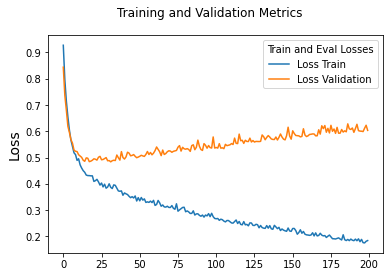